# Q-Learning for FrozenLake 4x4

Based on https://colab.research.google.com/drive/1oqon14Iq8jzx6PhMJvja-mktFTru5GPl#scrollTo=5aQKQMJTJBPH

<!-- ![image.png](attachment:image.png) -->

The Frozen Lake environment specifications can be found [here](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

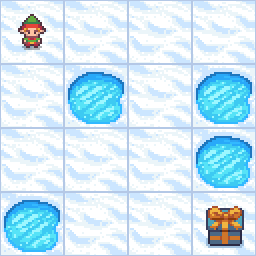

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.

Holes in the ice are distributed in set locations when using a pre-determined map or in random locations when a random map is generated.

The player makes moves until they reach the goal or fall in a hole.

## Imports

We start by importing the dependencies: Gymnasium, numpy, and random.

In [1]:
import gymnasium as gym

import numpy as np
import random

## Setting up and exploring the environment

Even though the original problem description has a slippery environment, we are going to start working in a non-slippery environment. In it, if you go right, you only go right; in the original environment, if you intend to go right, you can go right, up or down with 1/3 probability.

To make a deterministic Frozen Lake environment, we make use of the `is_slippery` flag. We'll also use `ansi`as rendering mode, as it is faster to visualize (the other option is `human`, which provides a graphical visualization).

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="ansi")

Render the environment on the screen.

In [3]:
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG


The action space size and the state space size for this environment can be obtained as follows:

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n
print(f'action size: {action_size}, state size: {state_size}')

action size: 4, state size: 16


## Q-Learning

We now proceed to implementing Q-learning and aplying it to our environment. In Q-learning, q-values are updated based on:

$Q(S_{t},A_{t}) \leftarrow Q(S_{t},A_{t}) + \alpha [R_{t+1} + \gamma \max_{a} Q(S_{t+1},a) - Q(S_{t},A_{t})]$

where $\alpha$ is the learning rate (aka step size), and $\gamma$ is the discount factor.

### The Q-table

First, we create a Q-table of shape *state_size* x *action_size*, and initialize its values with zeros.

In [5]:
# qtable = # your code here
#---
qtable = np.zeros((state_size, action_size))
print(qtable)
#---

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Learning hyperparameters

Now we create some hyperparameters for the Q-learning algorithm:
- the total number of episodes to run
- the maximum number of steps per episode
- the learning rate
- the discount factor
- the range for the exploration parameter epsilon
- the epsilon decay rate

In [6]:
total_episodes = 1000         # Total episodes
max_steps = 100               # Max steps per episode

learning_rate = 0.8           # Learning rate
gamma = 0.95                  # Discounting factor

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.001            # Exponential decay rate for exploration prob

### The Q-learning algorithm

Implement Q-learning and use it to train the agent, using an $\epsilon$-greedy action selection with decreasing exploration probability. Print some information as learning takes place.
Keep a list of the total rewards obtained after each episode.

In [7]:
# List of rewards
rewards = []

# Iterate through the number of episodes
for episode in range(total_episodes):
    print(f"episode: {episode}")
    
    # Reset the environment
    state = env.reset()[0]
    
    #print(f"state: {state}")
    episode_reward = 0
    
    for _ in range(max_steps):
        # Choose an action (a) in the current world state (s)
        
        # Shall we explore or exploit?
        ## generate a random number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > epsilon --> exploitation 
        if exp_exp_tradeoff > epsilon:
            # taking the biggest Q value for this state
            # your code here
            #---
            action = np.argmax(qtable[state,:])
            #---
        # Else explore randomly
        else:
            # your code here
            #---
            action = env.action_space.sample()
            #---
            
        # Take the action (a) and observe the outcome state (s') and reward (r)
        new_state, reward, terminated, truncated, info = env.step(action)
        
        # Update Q(s,a) = Q(s,a) + alpha [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # your code here
        #---
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        #---
        
        episode_reward += reward
        
        # Update state
        state = new_state
        
        # If done, finish episode
        if terminated or truncated:
            break
    
    # reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    rewards.append(episode_reward)

episode: 0
episode: 1
episode: 2
episode: 3
episode: 4
episode: 5
episode: 6
episode: 7
episode: 8
episode: 9
episode: 10
episode: 11
episode: 12
episode: 13
episode: 14
episode: 15
episode: 16
episode: 17
episode: 18
episode: 19
episode: 20
episode: 21
episode: 22
episode: 23
episode: 24
episode: 25
episode: 26
episode: 27
episode: 28
episode: 29
episode: 30
episode: 31
episode: 32
episode: 33
episode: 34
episode: 35
episode: 36
episode: 37
episode: 38
episode: 39
episode: 40
episode: 41
episode: 42
episode: 43
episode: 44
episode: 45
episode: 46
episode: 47
episode: 48
episode: 49
episode: 50
episode: 51
episode: 52
episode: 53
episode: 54
episode: 55
episode: 56
episode: 57
episode: 58
episode: 59
episode: 60
episode: 61
episode: 62
episode: 63
episode: 64
episode: 65
episode: 66
episode: 67
episode: 68
episode: 69
episode: 70
episode: 71
episode: 72
episode: 73
episode: 74
episode: 75
episode: 76
episode: 77
episode: 78
episode: 79
episode: 80
episode: 81
episode: 82
episode: 83
ep

Plot the cummulative reward obtained throughout the episodes.

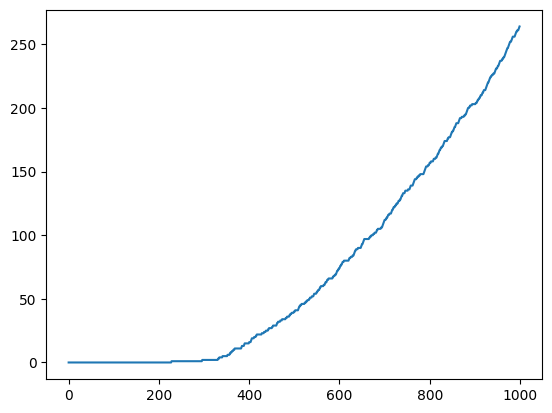

In [8]:
import matplotlib.pyplot as plt

cumulative_sum = np.cumsum(rewards)
plt.plot(cumulative_sum)
plt.show()

Print the resulting Q-table.

In [9]:
print(qtable)

[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.74756329 0.76425186]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450623]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


We can now print the optimal action for each state, according to the obtained Q-table values. All we need to do is to get the action with the maximum value.

In [10]:
env.reset()
print(env.render())

# Print the best action in every state
#LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3
# your code here
#---
print(np.argmax(qtable,axis=1).reshape(4,4))
#---


SFFF
FHFH
FFFH
HFFG

[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]


Visualize, state by state, the outcome of following a greedy policy. For that, you just need to choose the best action in each state.

In [11]:
state = env.reset()[0]

n_steps = 0
terminated = False
while terminated == False and n_steps < max_steps:
    print(env.render())
    # Take the action (index) that has the maximum expected future reward given the state
    # your code here
    #---
    action = np.argmax(qtable[state,:])
    #---

    # Make a step to the next state
    # your code here
    #---
    new_state, reward, terminated, truncated, info = env.step(action)
    state = new_state
    #---
    
    n_steps += 1

print(env.render())
env.close()
print(n_steps)


SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

6


## Using a stochastic environment

We now turn into using a slippery frozen lake environment.

In [14]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="ansi")

Run the q-learning algorithm in this new environment, and compare the obtained results both in terms of the q-table, cummulative rewards, and the optimal action in each state.

Try increasing the number of training episodes and see what you get.

Experiment with an 8x8 environment.

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode="ansi")
#...